In [19]:
import os
import numpy as np
import colorsys
from skimage.io import imread
from sklearn.cluster import KMeans
import PIL
from PIL import Image
from PIL.ImageColor import getcolor
from statistics import median, variance
import matplotlib.pyplot as plt
%matplotlib inline
%run ../functions.ipynb

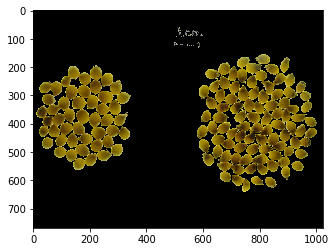

In [2]:
image = imread('kernels1-256.png')
segged = segment(image)

image1 = Image.fromarray(segged)
plt.imshow(np.asarray(image1))

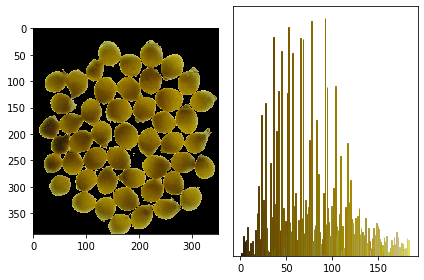

In [3]:
cropped1 = image1.crop((0,170,350,560))
colors1 = cropped1.getcolors(256)
colors1.sort(key=lambda x: x[1][0])
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)
fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped1))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors1):
    if c[1] == (0,0,0):
        continue
    ax[1].bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))
plt.tight_layout()
plt.show()

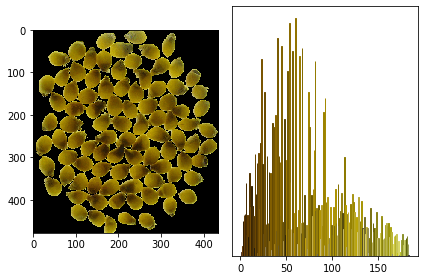

In [4]:
cropped2 = image1.crop((572,158, 1007, 635))
colors2 = cropped2.getcolors(256)

colors2.sort(key=lambda x: colorsys.rgb_to_hsv(*x[1])[0])

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

fig, ax = plt.subplots(ncols=2, subplot_kw = {'autoscaley_on':True})
ax[0].imshow(np.asarray(cropped2))
ax[1].get_yaxis().set_visible(False)
for idx, c in enumerate(colors2):
    if c[1] == (0,0,0):
        continue
    ax[1].bar(idx, c[0], color=hexencode(c[1]),edgecolor=hexencode(c[1]))
plt.tight_layout()
plt.show()

In [21]:
sum1, sum2 = 0, 0
count1, count2 = 0, 0

hues1 = [x for sublist in [c[0]*[colorsys.rgb_to_hsv(*c[1])[0]] for c in colors1] for x in sublist]
hues2 = [x for sublist in [c[0]*[colorsys.rgb_to_hsv(*c[1])[0]] for c in colors2] for x in sublist]

mean1 = sum(hues1) / len(hues1)
mean2 = sum(hues2) / len(hues2)

var1 = variance(hues1)
var2 = variance(hues2)

med1 = median(hues1)
med2 = median(hues2)

print("First image mean: " + str(mean1))
print("Second image mean: " + str(mean2))
print("First image variance: " + str(var1))
print("Second image variance: " + str(var2))
print("First image median: " + str(med1))
print("Second image median: " + str(med2))

First image mean: 0.07212899144955388
Second image mean: 0.07779471868713006
First image variance: 0.004454540105677762
Second image variance: 0.0044336304416916815
First image median: 0.11570247933884298
Second image median: 0.11585365853658536


(array([6.2194e+04, 7.1385e+04, 2.9170e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([0.        , 0.07916667, 0.15833333, 0.2375    , 0.31666667,
        0.39583333, 0.475     , 0.55416667, 0.63333333, 0.7125    ,
        0.79166667]),
 <a list of 10 Patch objects>)

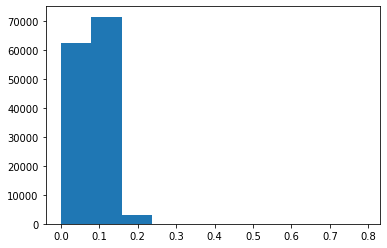

In [22]:
plt.hist(hues1)